## Interactively analysing components of rain gage data

Import the class object RainGage and initialize it with a file containing all of the data or with a list of years. The output from this are all contained in attributed of the ** `RainGage`** class. All of the data are contained in a **`pandas.DataFrame`** object called **`RainGage.df`**

In [78]:
%matplotlib inline
from rain import *
from common import *
from event import *

#### Charlotte:

In [79]:
path = '../../data/CHARLOTTE/Version1/'

rg = Rain(path=path, name='Charlotte_CRN_gage_{YEAR}.csv', year=range(1993, 2016), ngages=71, freq='15min')
rg.ll_file = 'Charlotte_CRN_lat_lon.csv'
rg.get_ll(cols=['lat','lon'])

rg.save_path = './output/Charlotte/'

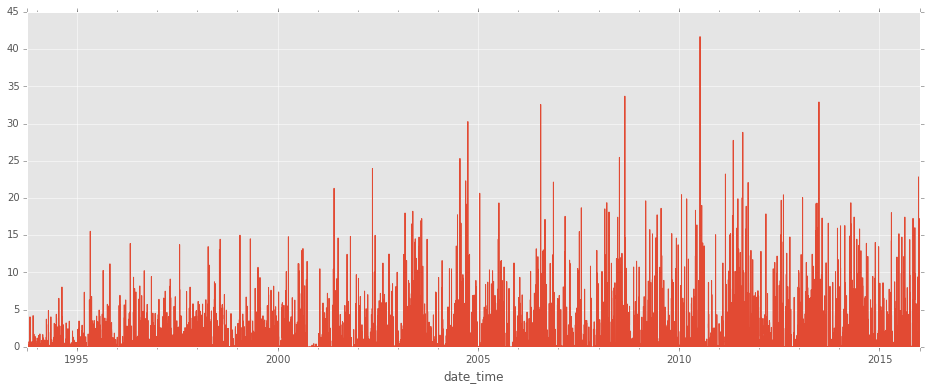

In [80]:
rg.rate.mean(axis=1).plot(figsize=(16,6))
plt.show()

Say we want to determine which days are wet and which aren't based on threshold. The default threshold is the minimum non-zero value recorded over a timestep. 

In [81]:
rg.thresh

1.0150000000000001

The threshold can be set by using **`Rain.thresh = `** and reset back to the default using **`Rain.reset_thresh()`** 

In [82]:
rg.reset_thresh()

Now we are ready to figure out which of the days are wet and which aren't

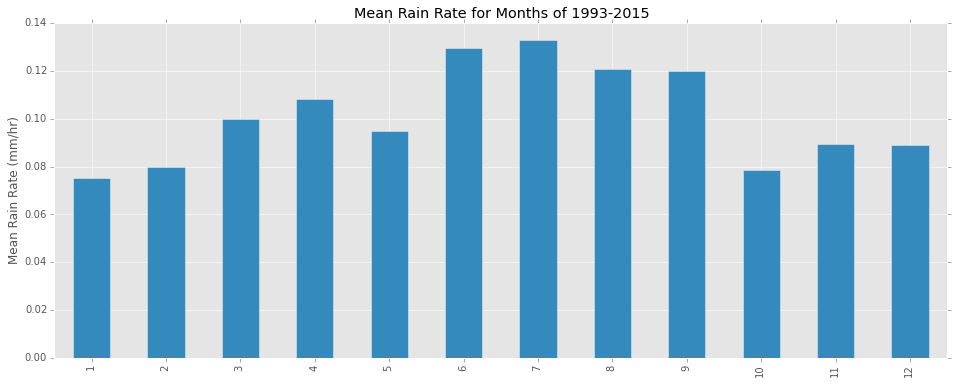

In [83]:
rg.plot_rate(interval='seasonal')

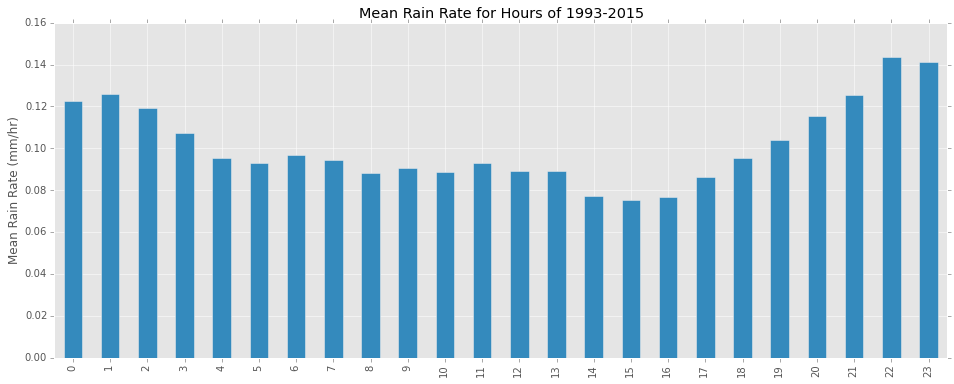

In [84]:
rg.plot_rate(interval='diurnal')

## Plotting probability of wet days occuring

We can make plots of the probability that different months will be wet:

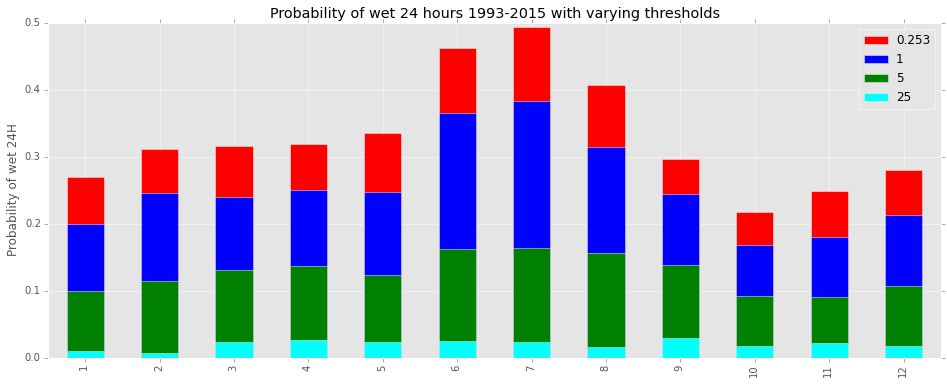

In [85]:
for mm, c in zip([.253, 1, 5, 25], ['red','blue','green','cyan']):
    rg.thresh = mm * rg.per_hour
    rg.plot_prob_wet(interval='seasonal', time_step='24H', base=12, color=c, save=False)
plt.legend([.253, 1, 5, 25])
title = 'Probability of wet 24 hours 1993-2015 with varying thresholds'
plt.title(title)
plt.savefig(rg.save_path + title + '.png')

We can make plots of the probability that different hours will be wet:

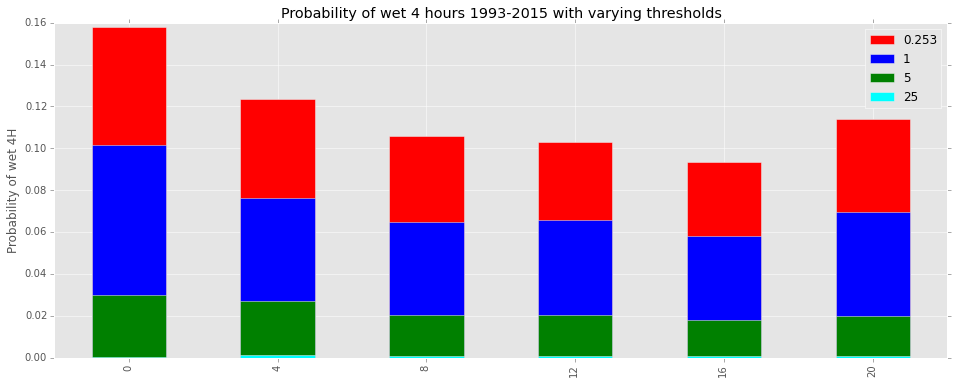

In [86]:
for mm, c in zip([.253, 1, 5, 25], ['red','blue','green','cyan']):
    rg.thresh = mm * rg.per_hour
    rg.plot_prob_wet(interval='diurnal', time_step='4H', color=c, save=False)
plt.legend([.253, 1, 5, 25])
title = 'Probability of wet 4 hours 1993-2015 with varying thresholds'
plt.title(title)
plt.savefig(rg.save_path + title + '.png')

If we are interested in the difference between the hours with a closer look at the months: 

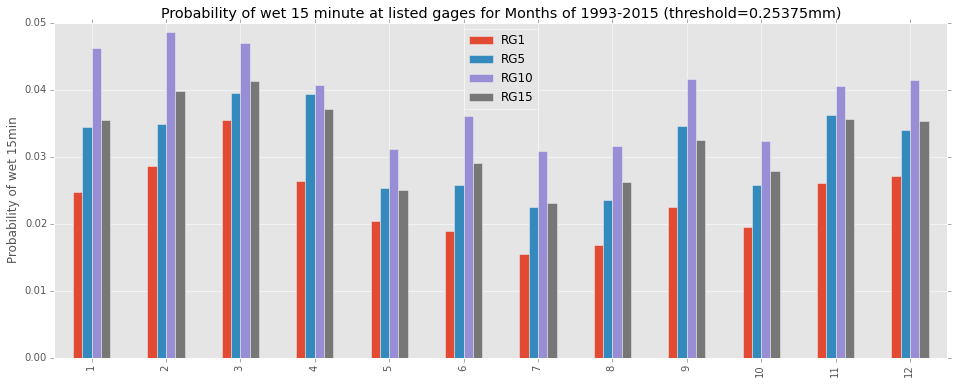

In [87]:
rg.reset_thresh()
rg.plot_prob_wet(interval='seasonal', gage=['RG1', 'RG5', 'RG10', 'RG15'])

## Plotting distribution of rain rates for wet days

When we are satisfied with the wet dry aspect of things we can make different assortments of boxplots to highlight the distribution of rainfall across months:

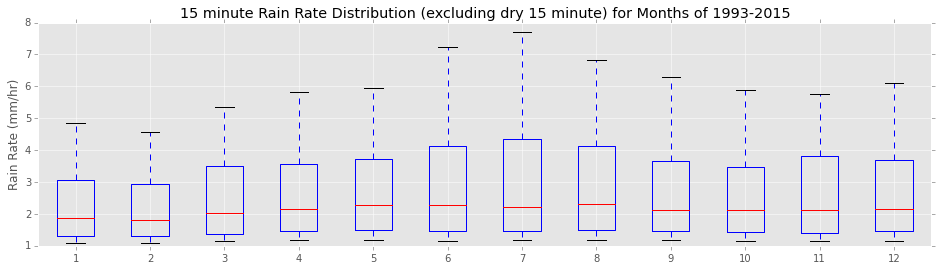

In [88]:
rg.plot_boxplots(interval='seasonal')

Across hours:

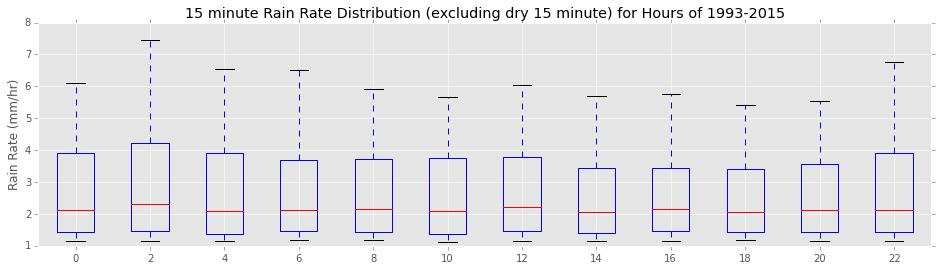

In [89]:
rg.plot_boxplots(interval='diurnal')

That was an average of all the months at each hour, but say we are just interested in September again:

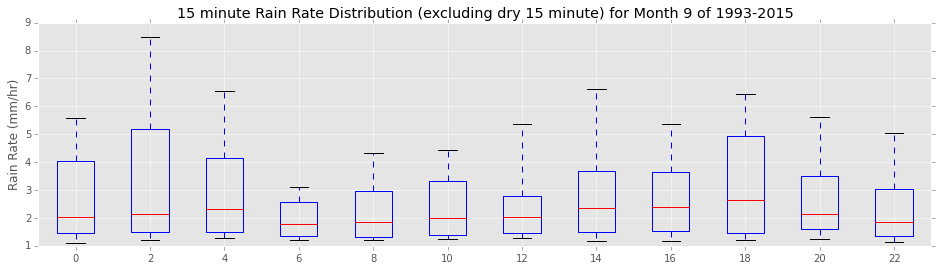

In [90]:
rg.plot_boxplots(interval='diurnal', m=9)

We can also change the time_step at which we evaluate rainfall from 15 minute, to 1 hour, or 1 day, or whatever we want!

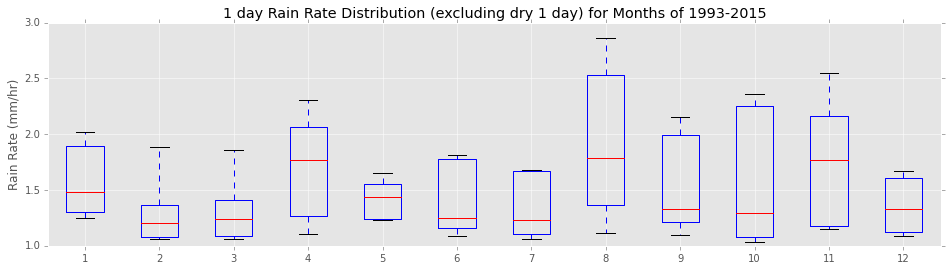

In [91]:
rg.plot_boxplots(interval='seasonal', time_step='1D')

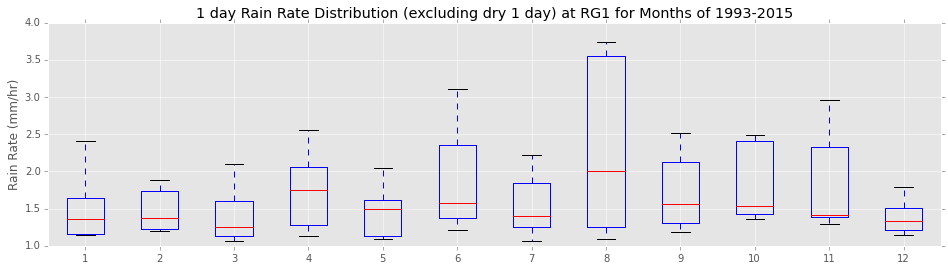

In [92]:
rg.plot_boxplots(interval='seasonal',gage='RG1', time_step='1D')

## AGU Plots

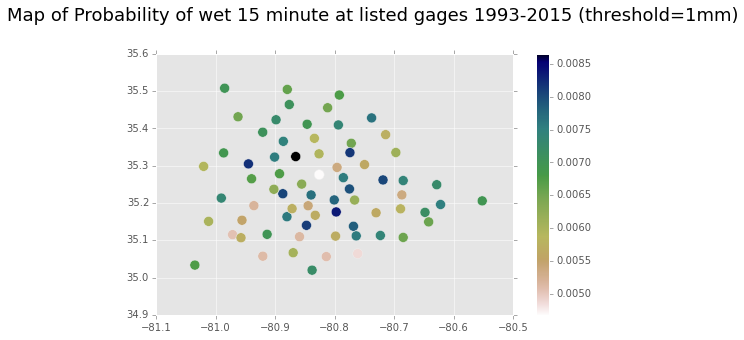

In [93]:
rg.thresh = 1*rg.per_hour
rg.plot_prob_wet(gage=rg.list_gages(), bar=False, map=True)

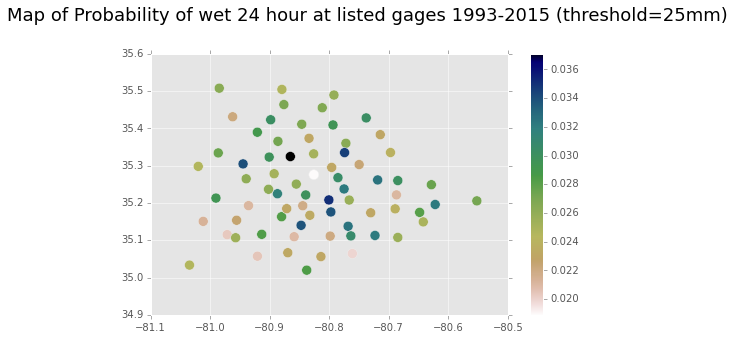

In [94]:
rg.thresh = 25 * rg.per_hour
rg.plot_prob_wet(time_step='24H', base=12, gage=rg.list_gages(), bar=False, map=True)

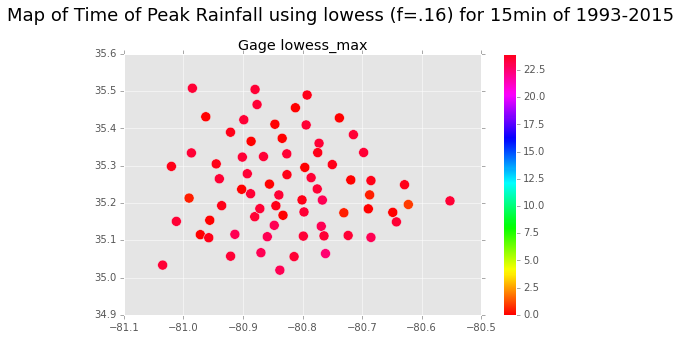

In [95]:
lm_gage = rg.get_max_lowess(interval='diurnal', f=1/6., example_plot=False).add_prefix('Gage ')
Event(rg.ll.join(lm_gage)).map_rain(latlon=True, cmap='hsv', sharec=(0,24), save_path=rg.save_path,
         title='Map of Time of Peak Rainfall using lowess (f=.16) for 15min of {y}'.format(y=rg.year))

## Check out one particular storm

In [99]:
rg.get_rainiest(4)
rg.rainiest.head()

,lat,lon,RG,Y,X,2011-08-06 12:00:00,2004-09-28 12:00:00,2004-09-08 12:00:00,2008-08-27 12:00:00
RG,,,,,,,,,
RG1,35.302925,-80.749975,RG1,3903.585629,-7336.066789,3.661833,5.495502,4.828434,9.021339
RG2,35.331667,-80.826389,RG2,3906.763710,-7340.399641,4.751917,4.387532,5.215467,7.925223
RG3,35.275833,-80.826111,RG3,3900.589991,-7345.441484,6.720417,4.086437,6.129867,7.172854
RG4,35.192778,-80.935833,RG4,3891.406210,-7362.947874,2.529417,0.000000,3.118485,6.344391
RG5,35.278333,-80.892778,RG5,3900.866426,-7351.273203,5.979583,2.344526,3.860906,7.065010


In [100]:
storm = Event(rg.ll.join(rg.rate['2008-08-26 12:00':'2008-08-27 12:00'].resample('1H', **get_resample_kwargs(rg.rate)).transpose()))


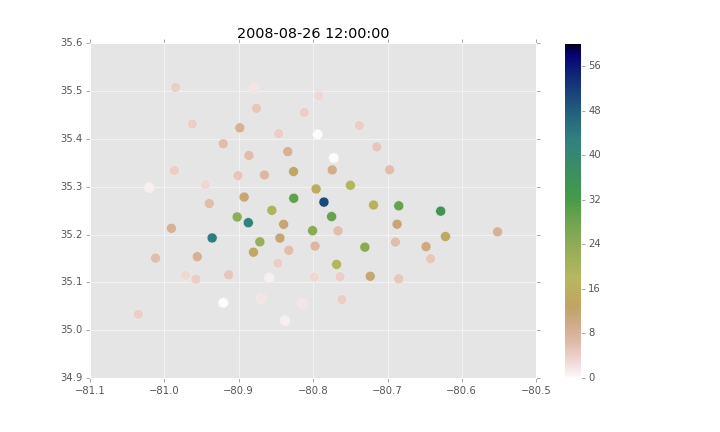
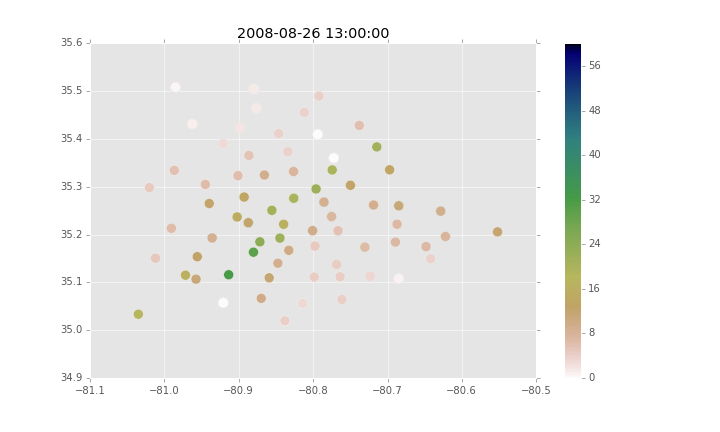
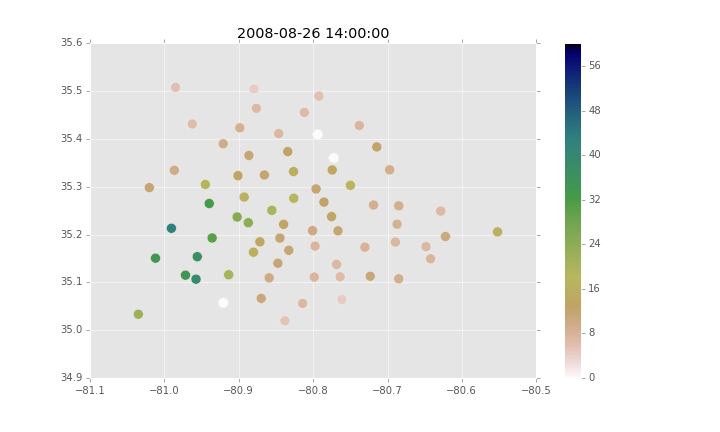
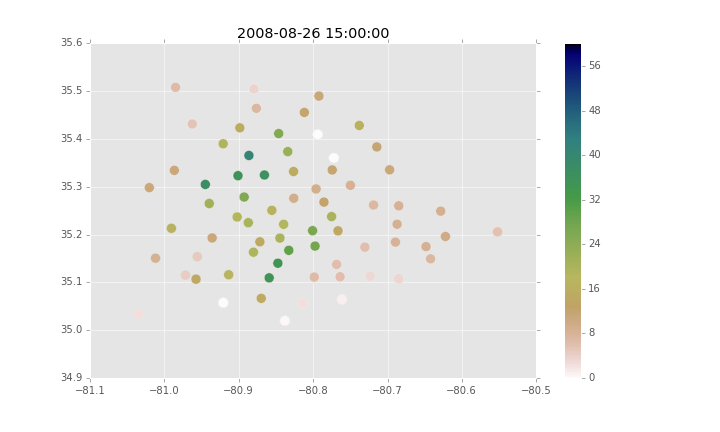
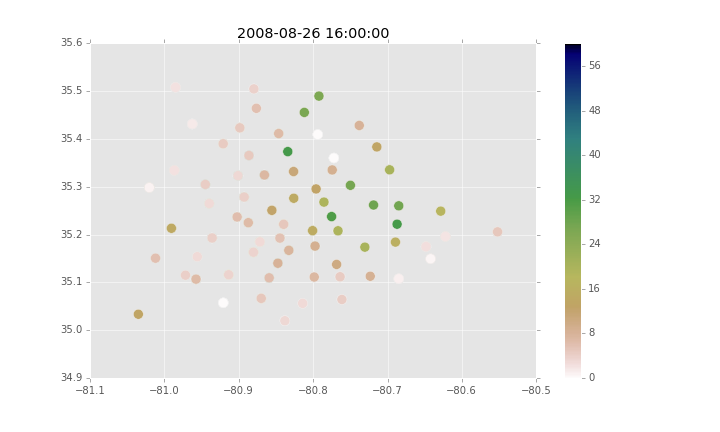
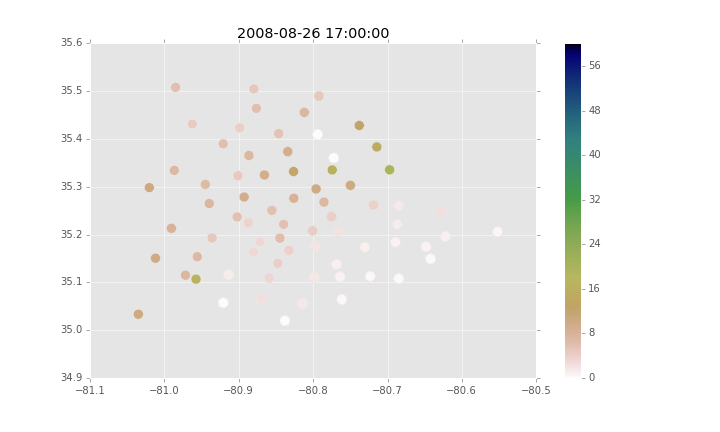
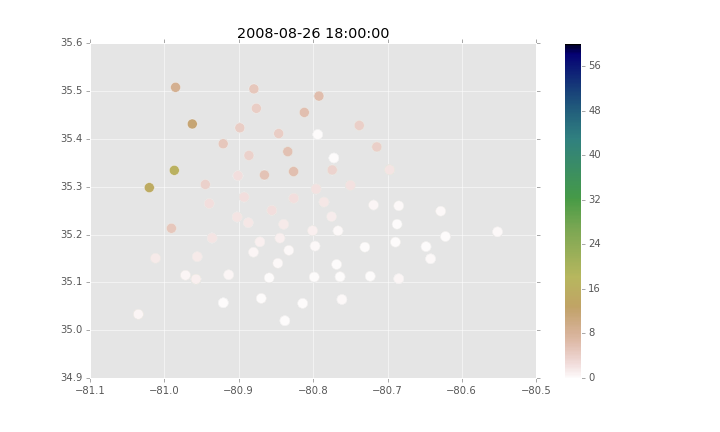
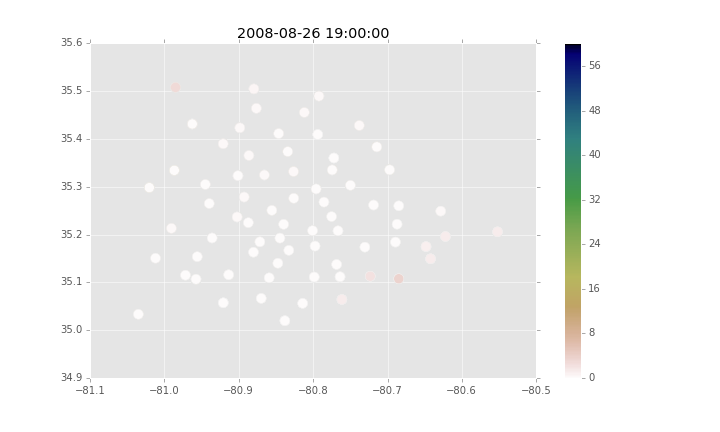
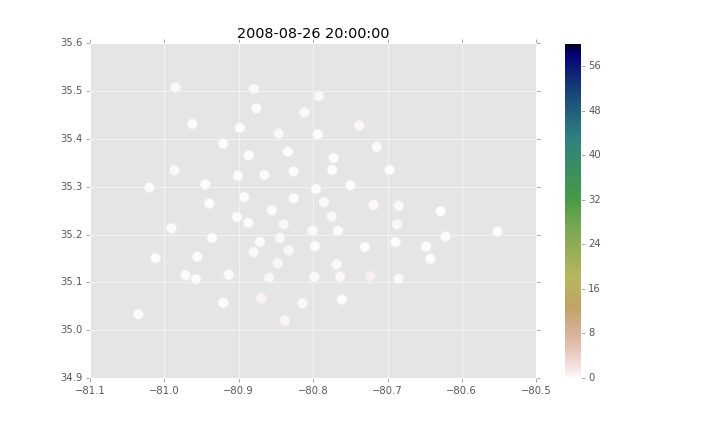
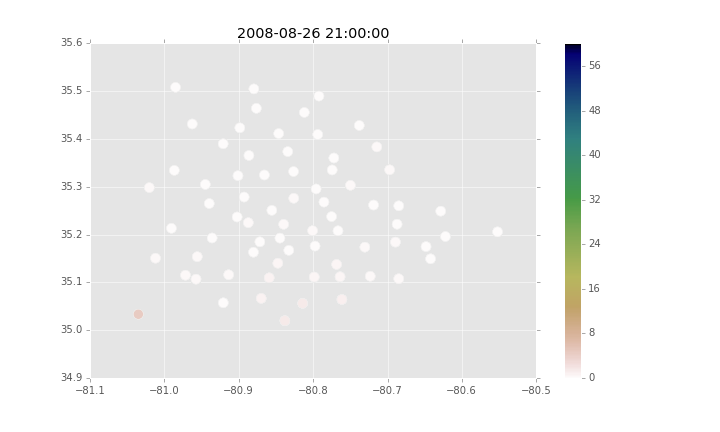
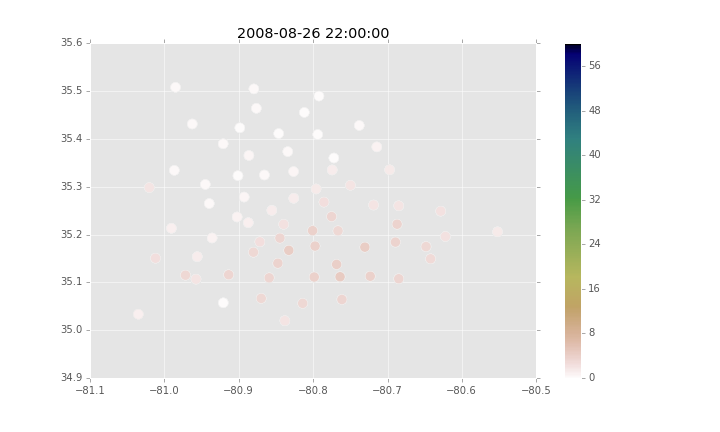
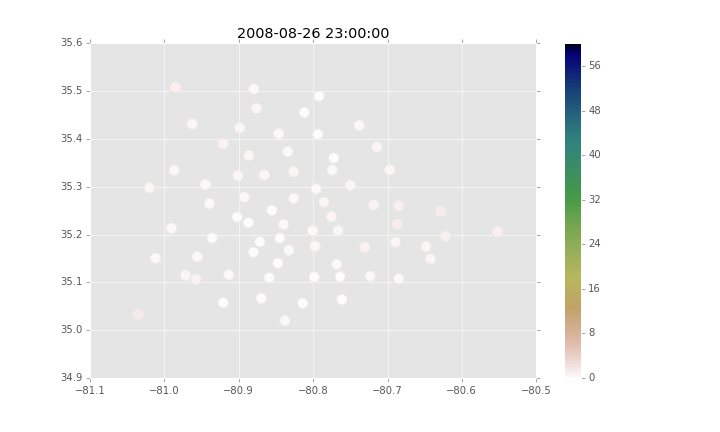
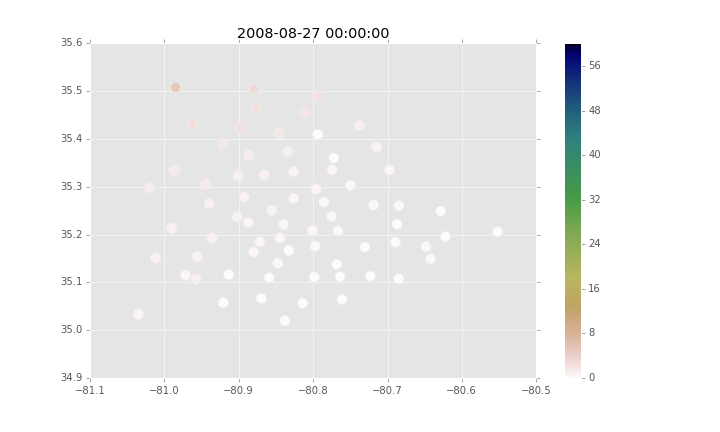
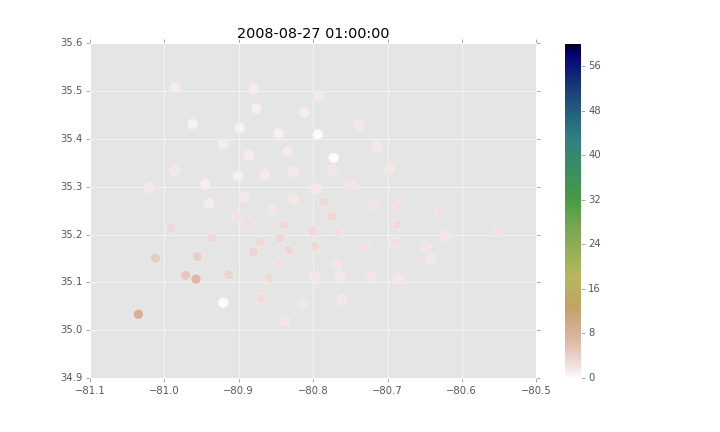
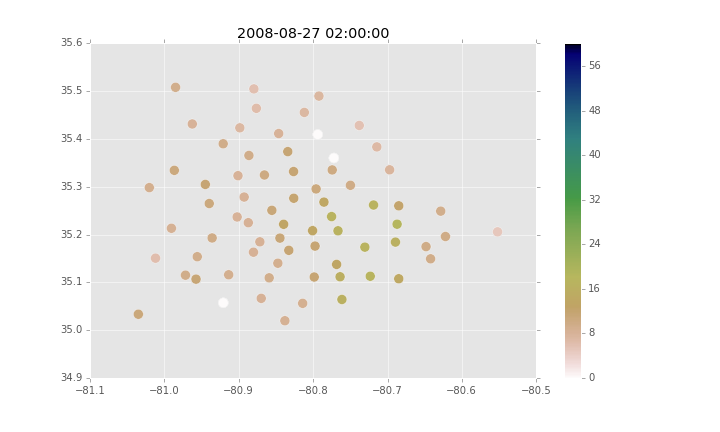
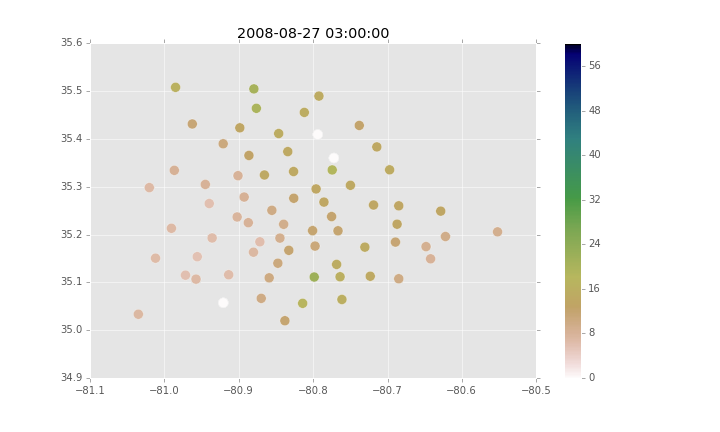
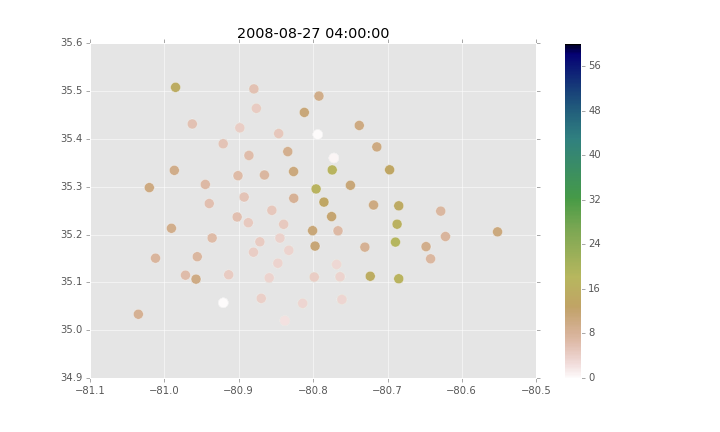
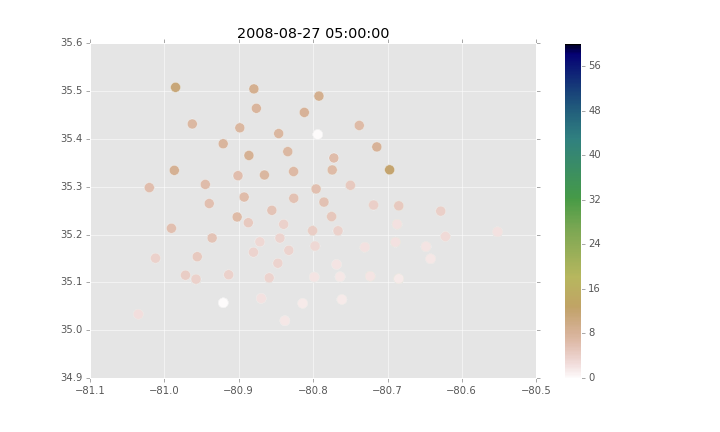
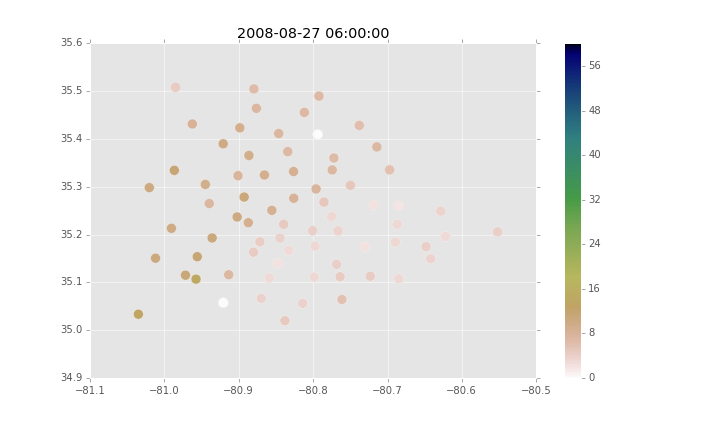
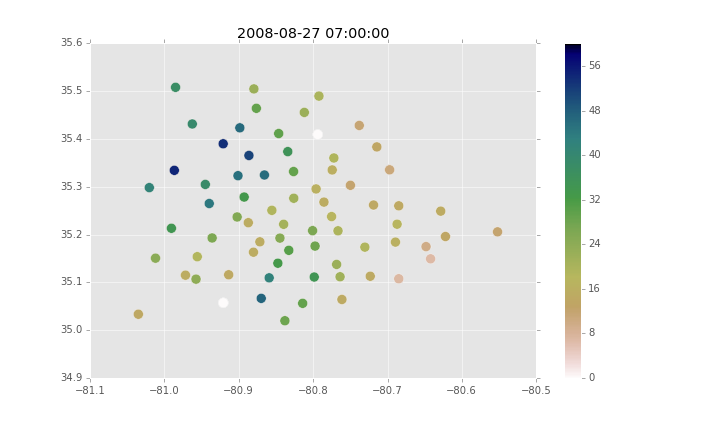
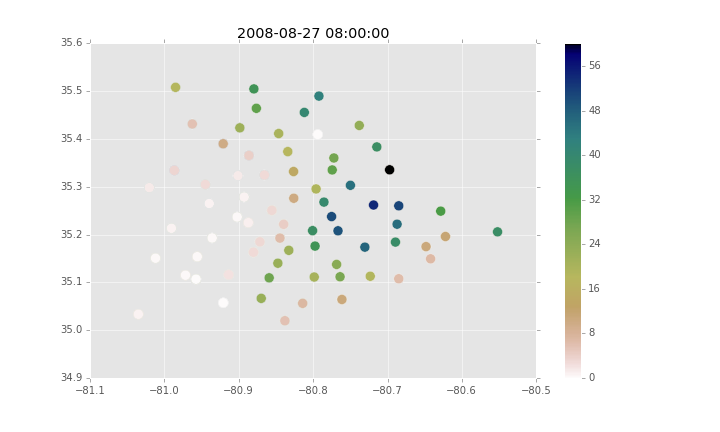
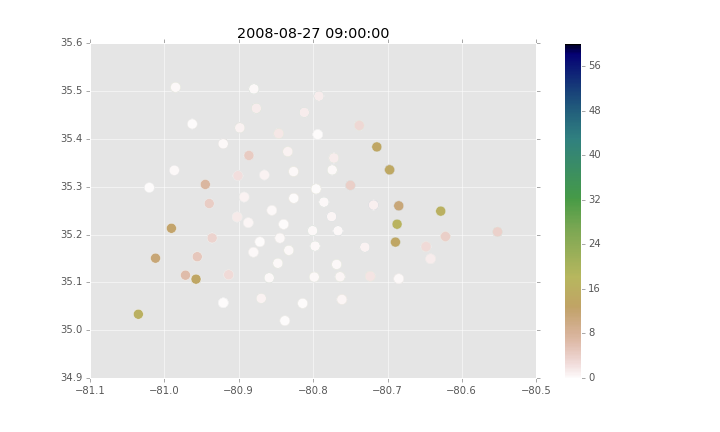
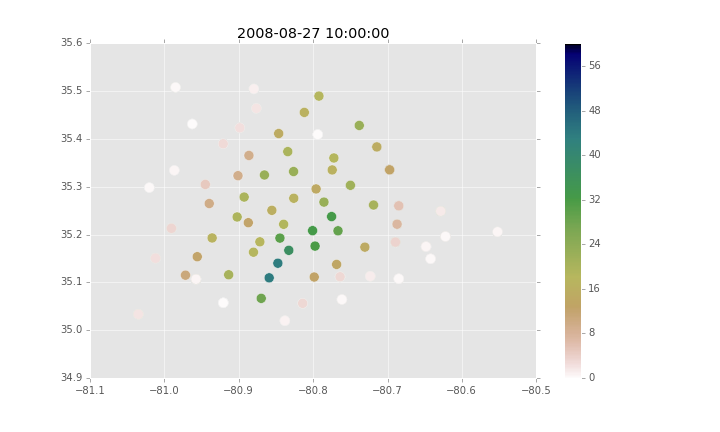
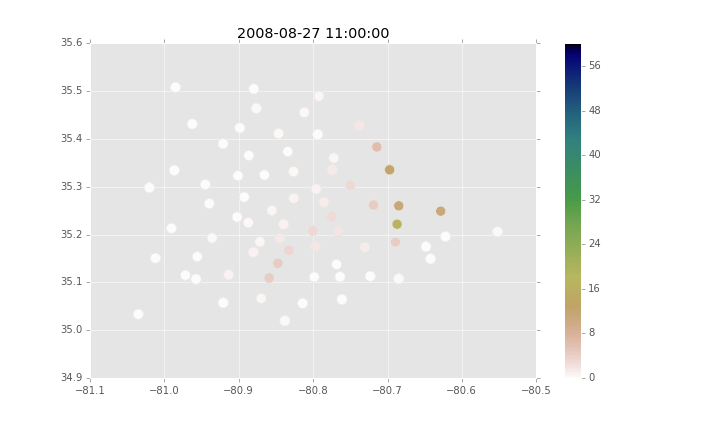
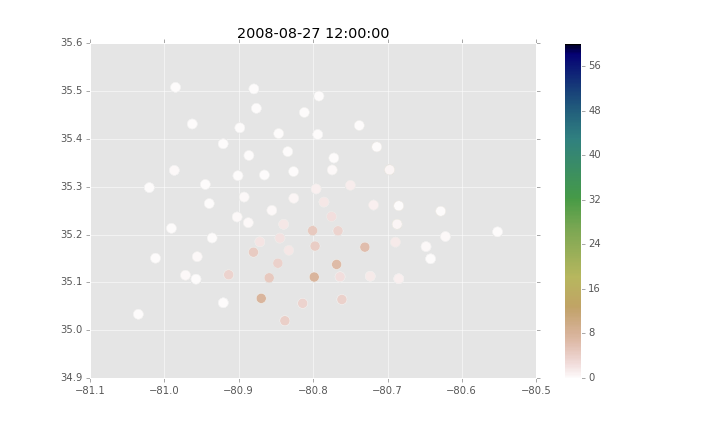

In [101]:
storm.movie()

[using ordinary kriging]
[using ordinary kriging]


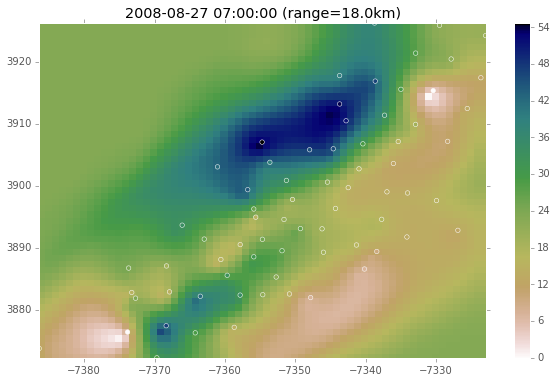

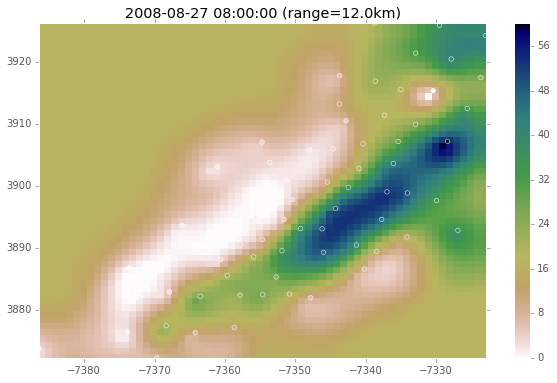

In [104]:
i = storm.df.columns.get_loc(pd.Timestamp('2008-08-27 07:00:00'))
k = storm.krige(i=i, res=False)
i = storm.df.columns.get_loc(pd.Timestamp('2008-08-27 08:00:00'))
k = storm.krige(i=i, res=False)